# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [2]:
# Use the following data for this assignment:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])


In [1]:
#STEP 0: CREATE VERTICLE SLIDER CLASS

from matplotlib.widgets import AxesWidget
import six

class VertSlider(AxesWidget):
    """
    A slider representing a floating point range.

    For the slider to remain responsive you must maintain a
    reference to it.

    The following attributes are defined
      *ax*        : the slider :class:`matplotlib.axes.Axes` instance

      *val*       : the current slider value

      *hline*     : a :class:`matplotlib.lines.Line2D` instance
                     representing the initial value of the slider

      *poly*      : A :class:`matplotlib.patches.Polygon` instance
                     which is the slider knob

      *valfmt*    : the format string for formatting the slider text

      *label*     : a :class:`matplotlib.text.Text` instance
                     for the slider label

      *closedmin* : whether the slider is closed on the minimum

      *closedmax* : whether the slider is closed on the maximum

      *slidermin* : another slider - if not *None*, this slider must be
                     greater than *slidermin*

      *slidermax* : another slider - if not *None*, this slider must be
                     less than *slidermax*

      *dragging*  : allow for mouse dragging on slider

    Call :meth:`on_changed` to connect to the slider event
    """
    def __init__(self, ax, label, valmin, valmax, valinit=0.5, valfmt='%1.2f',
                 closedmin=True, closedmax=True, slidermin=None,
                 slidermax=None, dragging=True, **kwargs):
        """
        Create a slider from *valmin* to *valmax* in axes *ax*.

        Additional kwargs are passed on to ``self.poly`` which is the
        :class:`matplotlib.patches.Rectangle` which draws the slider
        knob.  See the :class:`matplotlib.patches.Rectangle` documentation
        valid property names (e.g., *facecolor*, *edgecolor*, *alpha*, ...).

        Parameters
        ----------
        ax : Axes
            The Axes to put the slider in

        label : str
            Slider label

        valmin : float
            The minimum value of the slider

        valmax : float
            The maximum value of the slider

        valinit : float
            The slider initial position

        label : str
            The slider label

        valfmt : str
            Used to format the slider value, fprint format string

        closedmin : bool
            Indicate whether the slider interval is closed on the bottom

        closedmax : bool
            Indicate whether the slider interval is closed on the top

        slidermin : Slider or None
            Do not allow the current slider to have a value less than
            `slidermin`

        slidermax : Slider or None
            Do not allow the current slider to have a value greater than
            `slidermax`


        dragging : bool
            if the slider can be dragged by the mouse

        """
        AxesWidget.__init__(self, ax)

        self.valmin = valmin
        self.valmax = valmax
        self.val = valinit
        self.valinit = valinit
        self.poly = ax.axhspan(valmin, valinit, 0, 1, **kwargs)

        self.hline = ax.axhline(valinit, 0, 1, color='r', lw=1)

        self.valfmt = valfmt
        ax.set_xticks([])
        ax.set_ylim((valmin, valmax))
        ax.set_yticks([])
        ax.set_navigate(False)

        self.connect_event('button_press_event', self._update)
        self.connect_event('button_release_event', self._update)
        if dragging:
            self.connect_event('motion_notify_event', self._update)
        self.label = ax.text(0.5, 1.03, label, transform=ax.transAxes,
                             verticalalignment='center',
                             horizontalalignment='center')

        self.valtext = ax.text(0.5, -0.03, valfmt % valinit,
                               transform=ax.transAxes,
                               verticalalignment='center',
                               horizontalalignment='center')

        self.cnt = 0
        self.observers = {}

        self.closedmin = closedmin
        self.closedmax = closedmax
        self.slidermin = slidermin
        self.slidermax = slidermax
        self.drag_active = False

    def _update(self, event):
        """update the slider position"""
        if self.ignore(event):
            return

        if event.button != 1:
            return

        if event.name == 'button_press_event' and event.inaxes == self.ax:
            self.drag_active = True
            event.canvas.grab_mouse(self.ax)

        if not self.drag_active:
            return

        elif ((event.name == 'button_release_event') or
              (event.name == 'button_press_event' and
               event.inaxes != self.ax)):
            self.drag_active = False
            event.canvas.release_mouse(self.ax)
            return

        val = event.ydata
        if val <= self.valmin:
            if not self.closedmin:
                return
            val = self.valmin
        elif val >= self.valmax:
            if not self.closedmax:
                return
            val = self.valmax

        if self.slidermin is not None and val <= self.slidermin.val:
            if not self.closedmin:
                return
            val = self.slidermin.val

        if self.slidermax is not None and val >= self.slidermax.val:
            if not self.closedmax:
                return
            val = self.slidermax.val

        self.set_val(val)

    def set_val(self, val):
        xy = self.poly.xy
        xy[1] = 0, val
        xy[2] = 1, val
        self.poly.xy = xy
        self.valtext.set_text(self.valfmt % val)
        if self.drawon:
            self.ax.figure.canvas.draw_idle() #for matplotlib 2.x
#             self.ax.figure.canvas.draw() - for matplotlib 3.x
        self.val = val
        if not self.eventson:
            return
        for cid, func in six.iteritems(self.observers): #change to self.observers.iteritems() for matplotlib 3.x
            func(val)

    def on_changed(self, func):
        """
        When the slider value is changed, call *func* with the new
        slider position

        A connection id is returned which can be used to disconnect
        """
        cid = self.cnt
        self.observers[cid] = func
        self.cnt += 1
        return cid

    def disconnect(self, cid):
        """remove the observer with connection id *cid*"""
        try:
            del self.observers[cid]
        except KeyError:
            pass

    def reset(self):
        """reset the slider to the initial value if needed"""
        if (self.val != self.valinit):
            self.set_val(self.valinit)

In [3]:
#STEP 1: PREPARE ALL THE INPUTS
#Get the mean
df_mean=df.T.mean()

#Get the standard deviation
df_std=df.T.std()

#Define initial value to compare
y_thres = 41000

#Define z-critical value for 95% confidence level (z=1.96)
z_crit=1.96

#Formula for calculating confidence interval
conf_int = lambda x: z_crit*(x/np.sqrt(df.shape[1]))

# df_mean_scaled = df_mean.apply(lambda x: x-x*((df_mean.mean()-y_thres)/df_mean.mean()))


<IPython.core.display.Javascript object>


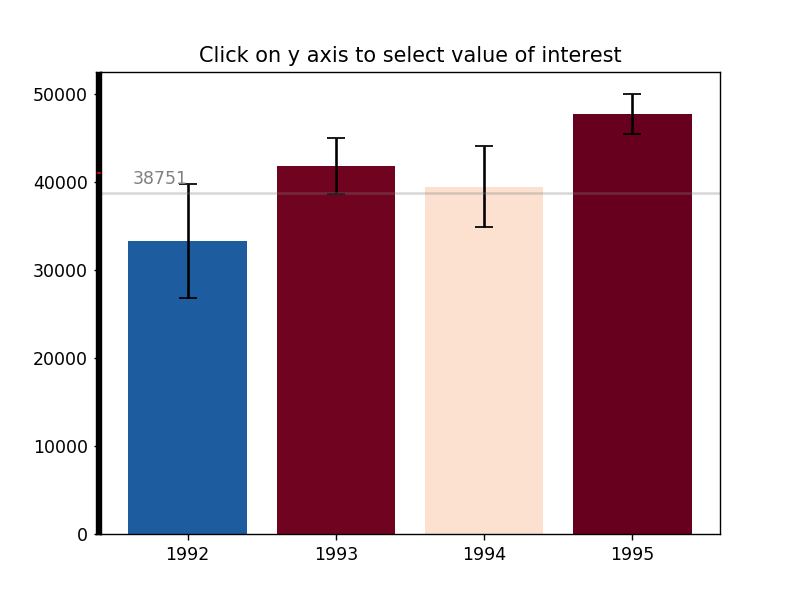

0

In [5]:
#STEP 2: PREPARE THE PLOT

from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook

#Function to get color list for bars.
def colors(thres, df_mean, df_std):
    result=[]
    for m,s in zip(df_mean, df_std):
        lower = m-conf_int(s) #calc lower threshold of confidence interval
        upper = m+conf_int(s) #calc upper threshold of confidence interval
        if thres < lower:
            result.append(0) #Deep blue if chosen value is higher than confidence interval
        elif upper < thres:
            result.append(1) #Deep red if chosen value is lower than confidence interval
        else:
            result.append((thres-lower)/(upper-lower)) #color gradient if chosen value is within confidence interval
    return result

#Draw initial plot
fig, ax = plt.subplots()

my_cmap = plt.get_cmap("RdBu") #Create ListedColorMap object from "Red-Blue" color divergent series
ax.bar(df_mean.index, df_mean, yerr=df_std.apply(conf_int), capsize=5, color=my_cmap(colors(y_thres, df_mean, df_std)))
labels=['1992','1993','1994','1995']
ax.set_xticks(df_mean.index)
ax.set_xticklabels(labels)
ax.set_title("Click on y axis to select value of interest")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#Draw line and value text for chosen value
style = dict(size=10, color='gray')
ax.axhline(y=y_thres, color="grey", alpha=0.3)
ax.text(1992, y_thres+1000, "%s" %y_thres, ha="right", **style)
plt.show()

#STEP 4: ADD INTERACTIVITY
#Create vertical slider to superimpose on y-axis
sliderax = plt.axes([0.12,0.11,0.006,0.77], facecolor="black")
slider = VertSlider(sliderax, "", int(ylim[0]), int(ylim[1]), valinit=y_thres, alpha=0)
slider.valtext.set_visible(False)

#Add update function
def update(val):
    thres = slider.val
    ax.clear()
    ax.bar(df_mean.index, df_mean, yerr=df_std.apply(conf_int), capsize=5, color=my_cmap(colors(thres,df_mean,df_std)))
    labels=['1992','1993','1994','1995']
    ax.set_xticks(df_mean.index)
    ax.set_xticklabels(labels)
    ax.set_title("Click on y axis to select value of interest")

    style = dict(size=10, color='gray')
    ax.axhline(y=thres, color="grey", alpha=0.3)
    ax.text(1992, thres+1000, "%s" %int(thres), ha="right", **style)
    plt.draw()

slider.on_changed(update)